# COURSE: PGP [AI&ML]
## Learner : Chaitanya Kumar Battula
## Module : Deep Learning
## Topic : Linear Regression with TensorFlow

In [1]:
import numpy as np
import pandas as pd

import pylab as pl

#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [16]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])


In [7]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b

In [8]:
loss = tf.reduce_mean(tf.square(y - train_y))

In [9]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

# define the training method 

In [10]:
train = optimizer.minimize(loss)

# initialize the variables 

In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# optimize and run the graph

In [12]:
loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 26992.592 77.07106 46.110275
5 1891.721 58.844624 47.59573
10 1762.7241 57.65104 53.019833
15 1653.5896 56.36652 58.023922
20 1559.0438 55.172844 62.68204
25 1477.1368 54.061794 67.01765
30 1406.1787 53.027664 71.05309
35 1344.7058 52.065132 74.809135
40 1291.4507 51.169243 78.30513
45 1245.3142 50.335377 81.55909
50 1205.3451 49.559242 84.58777
55 1170.7189 48.836845 87.406746
60 1140.7213 48.164467 90.030556
65 1114.734 47.538635 92.472694
70 1092.2202 46.95614 94.74576
75 1072.7162 46.413967 96.86146
80 1055.8192 45.90933 98.83067
85 1041.181 45.439632 100.66355
90 1028.4998 45.002457 102.36953
95 1017.5135 44.595547 103.9574


# plot the loss values

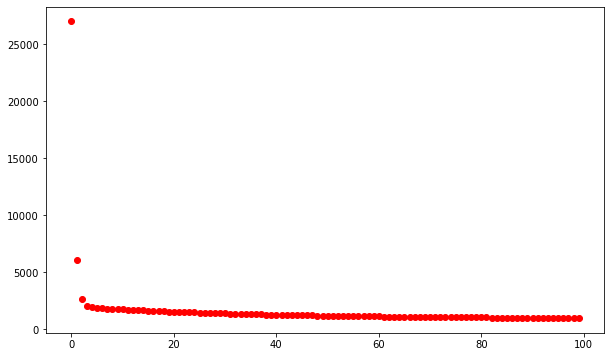

In [13]:
plt.plot(loss_values, 'ro')

# Plot  coefficient and intercept 

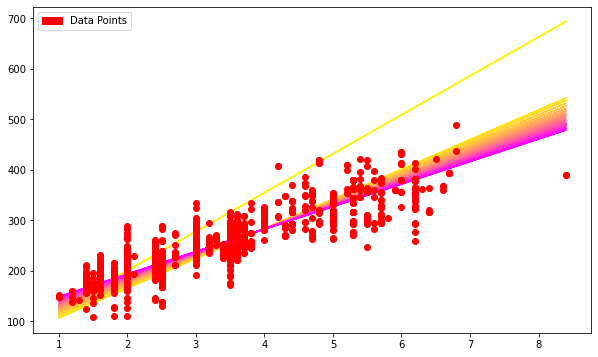

In [14]:
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(train_x)
    line = plt.plot(train_x, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(train_x, train_y, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()

---------------